In [337]:
import pandas as pd
import numpy as np

In [338]:
laptop_data = pd.read_csv('Downloads//laptop_data.csv')

In [339]:
laptop_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [340]:
laptop_data.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [341]:
# shape of dataframe before drop nan rows
laptop_data.shape

(1303, 13)

In [342]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [343]:
laptop_data.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [344]:
laptop_data.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [346]:
laptop_data.duplicated().sum()

58

In [347]:
# 30 rows out of 1303 are totally missing along with their 11 columns
laptop_data = laptop_data.dropna().reset_index(drop=True)

In [348]:
# shape of dataframe after drop nan rows
laptop_data.shape

(1273, 11)

In [349]:
laptop_data.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [350]:
#58 duplicated rows detected, with 30 rows containing all null values which are already dropped
# now it's time to drop all duplicated rows
laptop_data.drop_duplicates(inplace=True)

In [351]:
laptop_data.shape

(1244, 11)

#### Exploring the 'Company' column and identify any inconsistencies.

In [352]:
# explore with Company column
laptop_data['Company'].value_counts(dropna=False)

Company
Lenovo       282
Dell         281
HP           260
Asus         149
Acer         101
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

In [353]:
# Vero is the model of Acer so it needs to be replaced with Acer
laptop_data[laptop_data['Company'] == 'Vero']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
184,Vero,Notebook,14,IPS Panel Full HD 1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.3kg,13852.800
769,Vero,Notebook,14,1920x1080,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.22kg,10810.512
1014,Vero,Notebook,14,1366x768,Intel Atom X5-Z8350 1.44GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.45kg,11231.424
1092,Vero,Notebook,13.3,Full HD 1920x1080,Intel Atom X5-Z8350 1.44GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.35kg,10442.880


In [354]:
# dtype

laptop_data['Company'].dtype

dtype('O')

In [355]:
laptop_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [356]:
laptop_data['Company'].isna().sum()

0

In [357]:
#replace all Vero with Acer
laptop_data.loc[laptop_data['Company'] == 'Vero', 'Company'] = 'Acer'

In [358]:
# explore with Company column
laptop_data['Company'].value_counts(dropna=False)

Company
Lenovo       282
Dell         281
HP           260
Asus         149
Acer         105
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64

#### Explore the 'TypeName' column and identify any inconsistencies.

In [359]:
# frequency typename column
laptop_data['TypeName'].value_counts()

TypeName
Notebook              689
Gaming                203
Ultrabook             189
2 in 1 Convertible    112
Workstation            29
Netbook                22
Name: count, dtype: int64

In [360]:
# unique values
# need to replace Netbook to Notebook
laptop_data['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Gaming', '2 in 1 Convertible',
       'Workstation', 'Netbook'], dtype=object)

In [361]:
# dtype
# need to change data type
laptop_data['TypeName'].dtype

dtype('O')

In [362]:
# Netbook replace with Notebook
laptop_data.loc[laptop_data['TypeName'] == 'Netbook', 'TypeName'] = 'Notebook'

In [363]:
# frequency typename column
laptop_data['TypeName'].value_counts()

TypeName
Notebook              711
Gaming                203
Ultrabook             189
2 in 1 Convertible    112
Workstation            29
Name: count, dtype: int64

In [364]:
# change dtype
laptop_data['TypeName'] = laptop_data['TypeName'].astype('object')

In [365]:
# dtype
# need to change data type
laptop_data['TypeName'].dtype

dtype('O')

#### Explore the 'Inches' column and identify any inconsistencies.

In [366]:
laptop_data['Inches'].value_counts(dropna=False)

Inches
15.6    621
14      188
17.3    162
13.3    157
12.5     38
11.6     29
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: count, dtype: int64

In [367]:
# Upon manually searching using this laptop's specifications, 
# I discovered that the screen size is 15.6 inches.
laptop_data[laptop_data['Inches'] == '?']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
465,Dell,Workstation,?,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,128298.24


In [368]:
# so replace this ? with 15.6
laptop_data.loc[laptop_data['Inches'] == '?', 'Inches'] = '15.6'

In [369]:
laptop_data['Inches'].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '31.6', '17', '15', '14.1', '11.3', '10.1'], dtype=object)

In [370]:
# We have some centemeter values in inches column hence changing them.
def cm_to_inches(cm):
    inches = cm / 2.54
    return inches
laptop_data.loc[laptop_data['Inches'] >= '19.00', 'Inches'] = laptop_data[laptop_data['Inches'] >= '19.00']['Inches'].astype(float).apply(cm_to_inches)

In [372]:
laptop_data['Inches'].value_counts(dropna=False)

Inches
15.6                  622
14                    188
17.3                  162
13.3                  157
12.5                   38
11.6                   29
12                      6
13.9                    6
13.5                    5
12.3                    5
15.4                    4
15                      4
14.015748031496063      3
10.1                    3
9.448818897637794       2
13                      2
18.4                    1
10.748031496062993      1
13.188976377952756      1
12.440944881889765      1
17                      1
14.1                    1
11.3                    1
10.078740157480315      1
Name: count, dtype: int64

In [373]:
laptop_data['Inches'] = laptop_data['Inches'].astype(float).round(2)

In [374]:
laptop_data['Inches'].value_counts(dropna=False)

Inches
15.60    622
14.00    188
17.30    162
13.30    157
12.50     38
11.60     29
12.00      6
13.90      6
13.50      5
12.30      5
15.40      4
15.00      4
14.02      3
10.10      3
9.45       2
13.00      2
18.40      1
10.75      1
13.19      1
12.44      1
17.00      1
14.10      1
11.30      1
10.08      1
Name: count, dtype: int64

#### Explore the 'ScreenResolution' column and identify any inconsistencies

In [375]:
laptop_data['ScreenResolution'].str.split('HD').str.get(0).str.split('Display').str.get(0).value_counts()

ScreenResolution
Full                                 538
IPS Panel Full                       277
1366x768                             255
1600x900                              23
IPS Panel 4K Ultra                    23
IPS Panel Retina                      17
Quad                                  17
Touchscreen 1366x768                  16
4K Ultra                              16
IPS Panel Quad                         9
IPS Panel 1366x768                     7
Touchscreen 2560x1440                  6
Touchscreen 2256x1504                  6
IPS Panel Touchscreen 2560x1440        5
1440x900                               4
IPS Panel 2560x1440                    4
Touchscreen 2400x1600                  3
2560x1440                              3
IPS Panel Touchscreen 1366x768         3
1920x1080                              3
IPS Panel Touchscreen 1920x1200        3
IPS Panel Touchscreen / 4K Ultra       2
Touchscreen / Quad                     1
Touchscreen / Full                     1

In [376]:
laptop_data['ScreenResolution'].str.extract(r'([A-Za-z\s]+) Panel').value_counts(dropna=False)

NaN    893
IPS    351
Name: count, dtype: int64

In [377]:
# Regular expression pattern to find resolutions
pattern = r'\b\d{3,4}x\d{3,4}\b'

# Find resolutions for each value in the Series
laptop_data['ScreenResolution'].str.findall(pattern).str.get(0).value_counts().index

Index(['1920x1080', '1366x768', '3840x2160', '3200x1800', '1600x900',
       '2560x1440', '2560x1600', '2304x1440', '2256x1504', '1440x900',
       '2880x1800', '2400x1600', '1920x1200', '2160x1440', '2736x1824'],
      dtype='object', name='ScreenResolution')

In [378]:
laptop_data[laptop_data['ScreenResolution'].fillna('').str.contains('Full HD', case=False)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
2,HP,Notebook,15.60,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
8,Asus,Ultrabook,14.00,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,Acer,Ultrabook,14.00,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000
11,HP,Notebook,15.60,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,No OS,1.86kg,18381.0672
13,Dell,Notebook,15.60,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,26581.3920
16,Dell,Notebook,15.60,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,39693.6000
18,Lenovo,Notebook,15.60,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,26586.7200
19,Dell,Ultrabook,13.30,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22kg,52161.1200
20,Lenovo,Gaming,15.60,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.5kg,53226.7200
22,Dell,2 in 1 Convertible,13.30,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62kg,43636.3200


In [379]:
# extract resolution from this column values
# Regular expression pattern to find resolutions
pattern = r'\b\d{3,4}x\d{3,4}\b'

# Find resolutions for each value in the Series and create new column of resoultion
laptop_data['screen_resolution'] = laptop_data['ScreenResolution'].str.findall(pattern).str.get(0)

In [380]:
# unique display resolution
laptop_data['screen_resolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '2256x1504', '3840x2160', '2160x1440',
       '1600x900', '2560x1440', '2736x1824', '2400x1600', '1920x1200'],
      dtype=object)

#### Explore the 'Cpu' column and identify any inconsistencies.

In [381]:
laptop_data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [382]:
# Define regex pattern to match any number followed by "GHz"
pattern = r'\b\d+(?:\.\d+)?(?:GHz|Hz)\b'

# Find all matches in the Processor column
laptop_data['Cpu'].str.findall(pattern).value_counts()


Cpu
[2.5GHz]     275
[2.8GHz]     161
[2.7GHz]     157
[1.6GHz]     117
[2.3GHz]      84
[1.8GHz]      77
[2.6GHz]      73
[2GHz]        65
[1.1GHz]      53
[2.4GHz]      50
[2.0GHz]      19
[2.9GHz]      19
[3GHz]        19
[1.2GHz]      15
[2.2GHz]      11
[1.5GHz]      10
[1.44GHz]     10
[1.3GHz]       6
[3.6GHz]       5
[2.1GHz]       3
[3.1GHz]       3
[2.50GHz]      3
[0.9GHz]       2
[1.9GHz]       2
[1.0GHz]       1
[3.2GHz]       1
[1.92GHz]      1
[1.60GHz]      1
[2.70GHz]      1
Name: count, dtype: int64

In [383]:
# create processor_speed column from Cpu column

# Define regex pattern to match any number followed by "GHz"
pattern = r'\b\d+(?:\.\d+)?(?:GHz|Hz)\b'

# Find all matches in the Processor column
laptop_data['processor_speed'] = laptop_data['Cpu'].str.findall(pattern).str.get(0).str.split('G').str.get(0)


In [384]:
# unique processor_speed values 
laptop_data['processor_speed'].unique()

array(['2.3', '1.8', '2.5', '2.7', '3.1', '3', '2.2', '1.6', '2', '2.8',
       '1.2', '2.9', '2.4', '1.5', '1.9', '1.44', '1.1', '2.0', '1.3',
       '2.6', '3.6', '1.60', '3.2', '1.0', '2.1', '0.9', '1.92', '2.50',
       '2.70'], dtype=object)

In [385]:
# create one more column that is processor_brand
laptop_data['processor_brand'] = laptop_data['Cpu'].str.split(' ').str.get(0)

In [386]:
# unique processor brand
laptop_data['processor_brand'].unique()

array(['Intel', 'AMD', 'Samsung'], dtype=object)

In [387]:
# frequency 
laptop_data['processor_brand'].value_counts()

processor_brand
Intel      1183
AMD          60
Samsung       1
Name: count, dtype: int64

In [388]:
laptop_data[laptop_data['Cpu'].str.contains('Samsung')]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand
1163,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,35111.52,2400x1600,2.0,Samsung


In [389]:
pt = laptop_data['Cpu'].str.split('Intel').str.get(1)

# Function to handle unexpected float values
def handle_unexpected_values(val):
    if isinstance(val, list):
        return val[:-1]  # Extract all elements except the last one from the list
    else:
        return []  # Convert unexpected float value to an empty list

pt_list = pt.str.split(' ')

def merge_list_items(lst):
    return ' '.join(lst)

processor_type_intel = pt_list.apply(handle_unexpected_values).apply(merge_list_items)

In [390]:
pa = laptop_data['Cpu'].str.split('AMD').str.get(1)

# Function to handle unexpected float values
def handle_unexpected_values(val):
    if isinstance(val, list):
        return val[:-1]  # Extract all elements except the last one from the list
    else:
        return []  # Convert unexpected float value to an empty list

pt_list_amd = pa.str.split(' ')

def merge_list_items(lst):
    return ' '.join(lst)

processor_type_amd = pt_list_amd.apply(handle_unexpected_values).apply(merge_list_items)

In [391]:
sa = laptop_data['Cpu'].str.split('Samsung').str.get(1)

# Function to handle unexpected float values
def handle_unexpected_values(val):
    if isinstance(val, list):
        return val[:-1]  # Extract all elements except the last one from the list
    else:
        return []  # Convert unexpected float value to an empty list

pt_list_sa = sa.str.split(' ')

def merge_list_items(lst):
    return ' '.join(lst)

processor_type_sa = pt_list_sa.apply(handle_unexpected_values).apply(merge_list_items)

In [392]:
# create one more column that is processor_type
laptop_data['processor_type'] = (processor_type_intel + processor_type_amd + processor_type_sa)

In [393]:
laptop_data['processor_type']

0                        Core i5
1                        Core i5
2                  Core i5 7200U
3                        Core i7
4                        Core i5
5                 A9-Series 9420
6                        Core i7
7                        Core i5
8                  Core i7 8550U
9                  Core i5 8250U
10                 Core i5 7200U
11                 Core i3 6006U
12                       Core i7
13                 Core i3 6006U
14                     Core M m3
15                       Core i5
16                 Core i7 7500U
17                       Core i7
18                 Core i3 7100U
19                 Core i5 8250U
20                Core i5 7300HQ
21             E-Series E2-9000e
22                 Core i5 8250U
23                 Core i7 8550U
24                 Core i3 6006U
25                       Core i5
26                 Core i5 8250U
27                 Core i7 8650U
28                 Core i5 8250U
29                 Atom x5-Z8300
30        

### **Solve Memory Structural Problem**


In [394]:
laptop_data['Memory'].value_counts().index

Index(['256GB SSD', '1TB HDD', '500GB HDD', '512GB SSD',
       '128GB SSD +  1TB HDD', '128GB SSD', '256GB SSD +  1TB HDD',
       '32GB Flash Storage', '2TB HDD', '512GB SSD +  1TB HDD', '1TB SSD',
       '64GB Flash Storage', '256GB SSD +  2TB HDD', '256GB Flash Storage',
       '16GB Flash Storage', '1.0TB Hybrid', '32GB SSD', '180GB SSD',
       '128GB Flash Storage', '512GB SSD +  2TB HDD', '16GB SSD',
       '512GB Flash Storage', '1TB SSD +  1TB HDD', '128GB SSD +  2TB HDD',
       '256GB SSD +  500GB HDD', '256GB SSD +  256GB SSD',
       '512GB SSD +  256GB SSD', '512GB SSD +  512GB SSD',
       '64GB Flash Storage +  1TB HDD', '1TB HDD +  1TB HDD', '32GB HDD',
       '64GB SSD', '?', '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid',
       '1.0TB HDD', '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype='object', name='Memory')

In [395]:
laptop_data['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          209
500GB HDD                        121
512GB SSD                        112
128GB SSD +  1TB HDD              92
128GB SSD                         72
256GB SSD +  1TB HDD              71
32GB Flash Storage                35
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           13
64GB Flash Storage                12
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [396]:
laptop_data.loc[[350, 447, 795, 1083]]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type
350,Asus,Notebook,14.00,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2kg,50349.600,1920x1080,2.5,Intel,Core i5 7200U
447,Microsoft,Ultrabook,13.19,Touchscreen 2256x1504,Intel Core i7 7660U 2.5GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25kg,95850.720,2256x1504,2.5,Intel,Core i7 7660U
795,HP,Notebook,11.60,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.23kg,20512.800,1366x768,1.6,Intel,Celeron Dual Core N3060
1083,Dell,Notebook,15.60,1366x768,Intel Core i5 6200U 2.3GHz,4GB,500GB HDD,AMD Radeon R5 M315,Windows 7,2.24kg,40980.312,1366x768,2.3,Intel,Core i5 6200U


In [397]:
laptop_data.loc[770:775]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type
770,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.37kg,104961.60,1920x1080,2.7,Intel,Core i7 7500U
771,Lenovo,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,AMD Radeon R7 M460,Windows 10,2.08kg,51095.52,1920x1080,2.5,Intel,Core i5 7200U
772,Apple,Ultrabook,12.0,IPS Panel Retina Display 2304x1440,Intel Core M 1.2GHz,8GB,512GB Flash Storage,Intel HD Graphics 5300,Mac OS X,0.920kg,62071.20,2304x1440,1.2,Intel,Core M
773,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.42kg,124142.40,2560x1440,2.5,Intel,Core i5 7200U
774,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.63kg,15930.72,1366x768,1.1,Intel,Celeron Dual Core N3350
775,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,43156.80,1366x768,2.5,Intel,Core i5 7200U


In [398]:
# resolving the '?' entries in the memory column 
# and memory of this particular laptop is 1TB HDD 
laptop_data.loc[laptop_data['Memory'] == '?', 'Memory'] = '1TB HDD'

In [399]:
laptop_data['Memory']

0                           128GB SSD
1                 128GB Flash Storage
2                           256GB SSD
3                           512GB SSD
4                           256GB SSD
5                           500GB HDD
6                 256GB Flash Storage
7                 256GB Flash Storage
8                           512GB SSD
9                           256GB SSD
10                          500GB HDD
11                          500GB HDD
12                          256GB SSD
13                          256GB SSD
14                          256GB SSD
15                          256GB SSD
16                          256GB SSD
17                          512GB SSD
18                            1TB HDD
19                          128GB SSD
20               128GB SSD +  1TB HDD
21                          500GB HDD
22                          256GB SSD
23                          256GB SSD
24                            1TB HDD
25                128GB Flash Storage
26          

In [400]:
laptop_data['Memory'].str.split('SSD').str.get(0).unique()

array(['128GB ', '128GB Flash Storage', '256GB ', '512GB ', '500GB HDD',
       '256GB Flash Storage', '1TB HDD', '64GB Flash Storage',
       '32GB Flash Storage', '32GB ', '2TB HDD', '64GB ', '1.0TB Hybrid',
       '1TB ', '16GB ', '16GB Flash Storage',
       '64GB Flash Storage +  1TB HDD', '180GB ', '1TB HDD +  1TB HDD',
       '32GB HDD', '512GB Flash Storage', '128GB HDD', '240GB ', '8GB ',
       '508GB Hybrid', '1.0TB HDD'], dtype=object)

In [401]:
laptop_data[laptop_data['Memory'] == '1TB HDD +  1TB HDD']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type
685,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.1kg,33110.856,1920x1080,2.5,Intel,Core i5 7200U


In [402]:
laptop_data['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [543]:
pd.set_option('display.max_rows', 10)

In [404]:
import re

#create another storage_data dataframe for create three column from Memory column

data = laptop_data['Memory']
storage_data = pd.DataFrame({'storage':data})

# Function to extract SSD storage size
def extract_ssd_storage(storage):
    ssd_sizes = re.findall(r'(\d+GB) SSD', storage)
    return ' '.join(ssd_sizes)

# Function to extract HDD storage size
def extract_hdd_storage(storage):
    hdd_sizes = re.findall(r'(\d+GB|\d+TB) HDD', storage)
    return ' '.join(hdd_sizes)

# Function to extract flash storage size
def extract_flash_storage(storage):
    flash_sizes = re.findall(r'(\d+GB) Flash Storage', storage)
    return ' '.join(flash_sizes)

# Apply the functions to the 'storage' column
storage_data['SSD Storage'] = storage_data['storage'].apply(extract_ssd_storage)
storage_data['HDD Storage'] = storage_data['storage'].apply(extract_hdd_storage)
storage_data['Flash Storage'] = storage_data['storage'].apply(extract_flash_storage)

# Display the DataFrame with the extracted storage sizes
#storage_data[['storage', 'SSD Storage', 'HDD Storage', 'Flash Storage']]

In [405]:
# create new(ssd_storage) column from Memory column
laptop_data['ssd_storage'] = storage_data['SSD Storage'].str.split('GB').str.get(0)

# where nan value exists in ssd_storage; i want to assign nan values with '0'
laptop_data.loc[laptop_data['ssd_storage'] == '', 'ssd_storage'] = '0'

In [406]:
# create another new(hdd_storage) column from Memory column
laptop_data['hdd_storage'] = storage_data['HDD Storage'].str.split('GB').str.get(0)

# where nan value exists in hdd_storage; i want to assign nan values with '0'
laptop_data.loc[laptop_data['hdd_storage'] == '', 'hdd_storage'] = '0'

In [407]:
# create another new(flash_storage) column from Memory column
laptop_data['flash_storage'] = storage_data['Flash Storage'].str.split('GB').str.get(0)

# where nan value exists in flash_storage; i want to assign nan values with '0'
laptop_data.loc[laptop_data['flash_storage'] == '', 'flash_storage'] = '0'

In [408]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,2.3,Intel,Core i5,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,1.8,Intel,Core i5,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,2.5,Intel,Core i5 7200U,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,2.7,Intel,Core i7,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,3.1,Intel,Core i5,256,0,0


#### Explore the 'Gpu' column and identify any inconsistencies

In [409]:
laptop_data['Gpu'].str.split(' ').str.get(0).value_counts()

Gpu
Intel     684
Nvidia    389
AMD       170
ARM         1
Name: count, dtype: int64

In [410]:
laptop_data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

In [411]:
laptop_data[laptop_data['Gpu'].fillna('').str.contains('ARM')]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage
1163,Samsung,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15kg,35111.52,2400x1600,2.0,Samsung,Cortex A72&A53,0,0,32


In [412]:
laptop_data['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1050', 'AMD Radeon R2',
       'AMD Radeon 530', 'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvidia GeFo

#### Explore the 'OpSys' column and identify any inconsistencies

In [413]:
laptop_data['OpSys'].value_counts()

OpSys
Windows 10      1022
No OS             63
Linux             57
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [414]:
laptop_data[laptop_data['OpSys'] == 'Android']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage
1086,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4GB,64GB Flash Storage,Intel HD Graphics 400,Android,0.69kg,29250.72,1920x1200,1.44,Intel,Atom x5-Z8550,0,0,64


In [415]:
laptop_data['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux',
       'Windows 10 S', 'Chrome OS', 'Windows 7', 'Android'], dtype=object)

In [416]:
#In the laptop dataset, the 'android OpSys' column exhibits significant inconsistency, 
#prompting its removal from the DataFrame.
laptop_data.drop(1086, inplace=True)

In [417]:
#Creating a OS column
laptop_data['os'] = laptop_data['OpSys'].str.split(' ').str.get(0).str.lower()

In [418]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600,2.3,Intel,Core i5,128,0,0,macos
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900,1.8,Intel,Core i5,0,0,128,macos
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080,2.5,Intel,Core i5 7200U,256,0,0,no
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,2880x1800,2.7,Intel,Core i7,512,0,0,macos
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,2560x1600,3.1,Intel,Core i5,256,0,0,macos


#### Explore the 'Weight' column and identify any inconsistencies

In [419]:
laptop_data['Weight'].value_counts()

Weight
2.2kg       106
2.1kg        57
2.4kg        41
2.5kg        37
2.3kg        37
2kg          32
2.8kg        27
1.2kg        23
1.86kg       23
1.4kg        23
2.18kg       22
1.6kg        20
2.04kg       20
1.9kg        19
1.5kg        19
1.95kg       18
1.7kg        17
1.8kg        15
1.3kg        15
3kg          14
1.91kg       14
1.1kg        14
1.26kg       13
1.36kg       13
1.37kg       13
2.62kg       12
1.25kg       12
2.7kg        12
1.29kg       11
4.42kg       11
1.63kg       11
1.48kg       10
1.84kg       10
2.0kg        10
2.6kg        10
1.49kg       10
2.23kg        9
2.65kg        9
1.64kg        9
1.44kg        9
2.06kg        8
2.9kg         8
1.54kg        8
2.31kg        8
2.36kg        8
2.02kg        7
1.05kg        7
1.45kg        7
1.32kg        7
3.2kg         7
1.23kg        7
1.65kg        7
1.75kg        6
1.42kg        6
1.62kg        6
2.25kg        6
1.34kg        6
1.28kg        6
1.88kg        6
1.43kg        6
2.32kg        5
1.16kg        5
1

In [420]:
laptop_data['Weight']

0         1.37kg
1         1.34kg
2         1.86kg
3         1.83kg
4         1.37kg
5          2.1kg
6         2.04kg
7         1.34kg
8          1.3kg
9          1.6kg
10        1.86kg
11        1.86kg
12        1.83kg
13         2.2kg
14        0.92kg
15        1.37kg
16         2.2kg
17        1.83kg
18         2.2kg
19        1.22kg
20         2.5kg
21        1.86kg
22        1.62kg
23        1.91kg
24         2.3kg
25        1.35kg
26         2.2kg
27        1.88kg
28         2.5kg
29        1.89kg
30        1.65kg
31        2.71kg
32         1.2kg
33        1.35kg
34        1.44kg
35         2.1kg
36         2.8kg
37        1.86kg
38         2.1kg
39           2kg
40        2.65kg
41         2.3kg
42         2.2kg
43        2.77kg
44        1.37kg
45         3.2kg
46         2.3kg
47         2.8kg
48         2.2kg
49        1.86kg
50        1.49kg
51         2.4kg
52        2.13kg
53        1.91kg
54           2kg
55        2.43kg
56           2kg
57         2.8kg
58         1.7

In [421]:
laptop_data.loc[laptop_data['Weight'] == '?', 'Weight'] = '1.21'

In [422]:
laptop_data['Weight']=laptop_data['Weight'].str.split('kg').str.get(0).dropna()

In [544]:
laptop_data['Weight'].value_counts(dropna=False)

Weight
2.20    110
2.10     58
2.00     43
2.40     41
2.30     37
       ... 
1.41      1
3.60      1
1.55      1
3.40      1
2.34      1
Name: count, Length: 174, dtype: int64

In [424]:
laptop_data[laptop_data['Weight'].isin(['7.2kg', '8.23kg', '8.4kg'])]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os


In [425]:
laptop_data.loc[laptop_data['Weight'] ==  '0.0002', 'Weight'] = '2.0'

In [426]:
laptop_data.loc[128, 'Weight'] = '2.1'

In [427]:
laptop_data.loc[232, 'Weight'] = '2.2'

In [428]:
laptop_data.loc[laptop_data['Weight'] == '5.4', 'Weight'] = '1.39'

In [429]:
laptop_data['Weight'] = laptop_data['Weight'].astype(float)

In [430]:
heavy_laptops = laptop_data[laptop_data['Weight'] > 5]

In [431]:
heavy_laptops

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os
293,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,5.80,34578.72,1600x900,2.5,Intel,Core i5 7200U,0,1TB,0,windows
317,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,8.23,29250.72,1366x768,2.5,Intel,Core i5 7200U,0,1TB,0,windows
574,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,256GB SSD,Intel HD Graphics 520,Windows 10,8.40,89137.44,1920x1080,2.6,Intel,Core i7 6600U,256,0,0,windows
614,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,11.10,101232.00,1920x1080,2.7,Intel,Core i7 7500U,512,0,0,windows
640,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,6.20,48964.32,1920x1080,1.8,Intel,Core i7 8550U,256,0,0,windows


In [432]:
heavy_laptops = laptop_data[laptop_data['Weight'] > 5]

In [433]:
heavy_laptops

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os
293,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,5.80,34578.72,1600x900,2.5,Intel,Core i5 7200U,0,1TB,0,windows
317,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,8.23,29250.72,1366x768,2.5,Intel,Core i5 7200U,0,1TB,0,windows
574,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,256GB SSD,Intel HD Graphics 520,Windows 10,8.40,89137.44,1920x1080,2.6,Intel,Core i7 6600U,256,0,0,windows
614,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,11.10,101232.00,1920x1080,2.7,Intel,Core i7 7500U,512,0,0,windows
640,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,6.20,48964.32,1920x1080,1.8,Intel,Core i7 8550U,256,0,0,windows


In [434]:
laptop_data.loc[laptop_data['Weight'] == 5.8, 'Weight'] = 2.8

In [435]:
laptop_data.loc[laptop_data['Weight'] == 11.1, 'Weight'] = 1.1

In [436]:
laptop_data.loc[laptop_data['Weight'] == 6.2, 'Weight'] = 2.13

#### Explore the 'Ram' column and identify any inconsistencies

In [437]:
laptop_data['Ram'].value_counts().index

Index(['8GB', '4GB', '16GB', '6GB', '12GB', '32GB', '2GB', '64GB', '24GB',
       '1GB'],
      dtype='object', name='Ram')

In [438]:
laptop_data[laptop_data['Ram'] == '64GB']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os
68,Dell,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,64GB,256GB SSD,AMD Radeon 530,Windows 10,1.40,50882.4000,1920x1080,1.8,Intel,Core i7 8550U,256,0,0,windows
702,Lenovo,Ultrabook,14.0,IPS Panel Quad HD+ 2560x1440,Intel Core i7 6500U 2.5GHz,64GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.17,89864.1792,2560x1440,2.5,Intel,Core i7 6500U,512,0,0,windows
1038,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58,211788.0000,1920x1080,2.7,Intel,Core i7 6820HK,0,0,0,windows


In [439]:
laptop_data[laptop_data['Ram'] == '24GB']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os
427,Lenovo,Ultrabook,9.45,2560x1440,Intel Core i7 7500U 2.7GHz,24GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.32,126912.96,2560x1440,2.7,Intel,Core i7 7500U,512,0,0,windows
482,Asus,Gaming,17.30,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,24GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,67612.32,1920x1080,2.6,Intel,Core i7 6700HQ,256,1TB,0,windows
505,Asus,Gaming,15.60,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,24GB,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,158135.04,1920x1080,2.8,Intel,Core i7 7700HQ,512,0,0,windows


In [440]:
laptop_data[laptop_data['Ram'] == '1GB']

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os
688,Acer,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,1GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6,53226.72,1920x1080,1.6,Intel,Core i5 8250U,256,0,0,windows


In [441]:
laptop_data.loc[88, 'Ram'] = '4GB'

In [442]:
laptop_data.loc[611, 'Ram'] = '4GB'

In [443]:
laptop_data.loc[laptop_data['Ram'] == '1GB', 'Ram'] = '8GB'

In [444]:
laptop_data.loc[[68, 702], 'Ram'] = '8GB'

In [445]:
laptop_data['Ram'] = laptop_data['Ram'].str.replace('GB', '').astype(int)

In [446]:
laptop_data['Ram'].value_counts()

Ram
8     598
4     359
16    192
6      34
12     25
32     17
2      14
24      3
64      1
Name: count, dtype: int64

### Explore Price column

In [447]:
laptop_data['Price'].describe()

count      1243.000000
mean      60631.450094
std       37429.117737
min        9270.720000
25%       32687.280000
50%       52693.920000
75%       79813.440000
max      324954.720000
Name: Price, dtype: float64

In [448]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1243 entries, 0 to 1243
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1243 non-null   object 
 1   TypeName           1243 non-null   object 
 2   Inches             1243 non-null   float64
 3   ScreenResolution   1243 non-null   object 
 4   Cpu                1243 non-null   object 
 5   Ram                1243 non-null   int32  
 6   Memory             1243 non-null   object 
 7   Gpu                1243 non-null   object 
 8   OpSys              1243 non-null   object 
 9   Weight             1243 non-null   float64
 10  Price              1243 non-null   float64
 11  screen_resolution  1243 non-null   object 
 12  processor_speed    1243 non-null   object 
 13  processor_brand    1243 non-null   object 
 14  processor_type     1243 non-null   object 
 15  ssd_storage        1243 non-null   object 
 16  hdd_storage        1243 non-n

### Feature Analysis

In [449]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

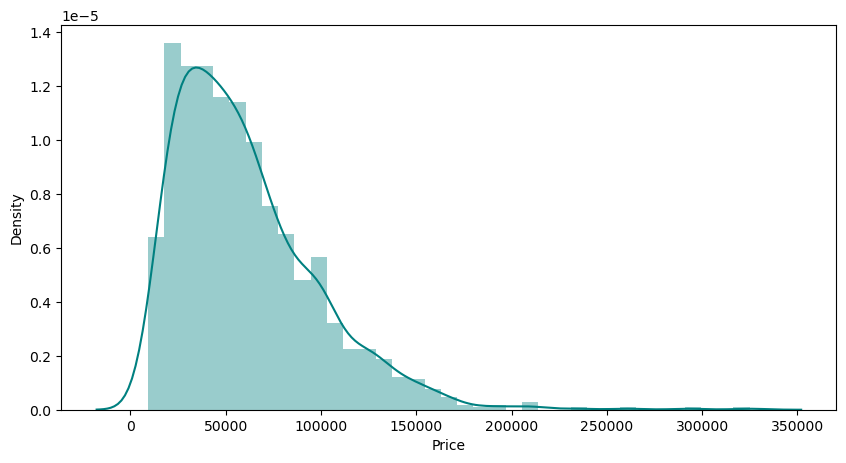

In [450]:
plt.figure(figsize=(10,5))
sns.distplot(laptop_data['Price'],color='teal')
plt.show()

In [451]:
# Making function for count plot
font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
                  'verticalalignment':'bottom'}

def countplot(column, xlabel, ylabel, title):
    plt.figure(figsize = (10,5))
    plot = sns.countplot(x= column, data = laptop_data)
    #plot = sns.countplot(x=column, data=laptop_data, palette='bright')
    plt.setp(plot.get_xticklabels(), rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel, **font)
    plt.title(title, **font)
    plt.show()

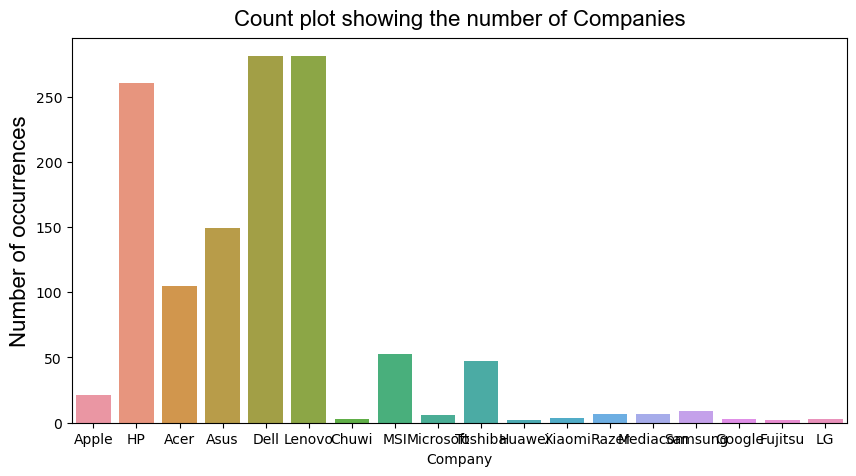

In [452]:
countplot('Company', 'Company', 'Number of occurrences', 'Count plot showing the number of Companies')
#Most popular laptop brands  are Dell, lenovo and Hp.

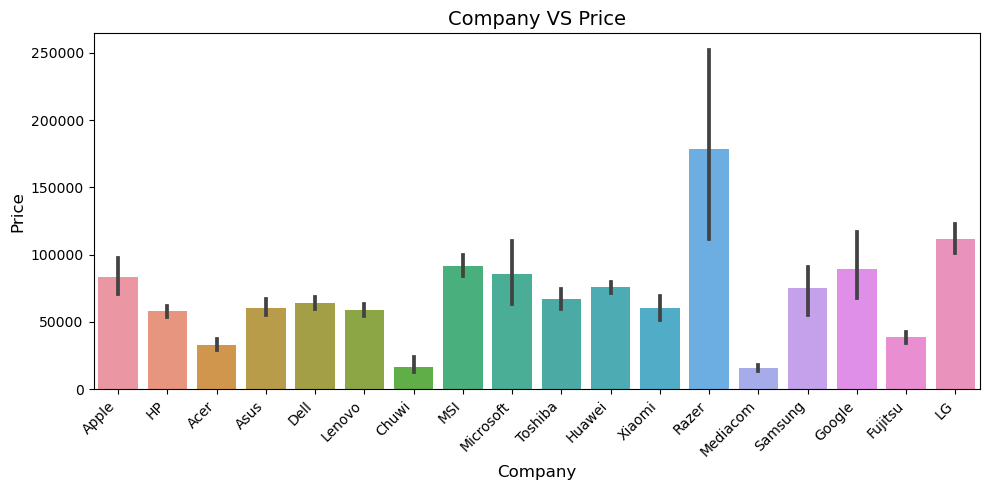

In [453]:
plt.figure(figsize=(10, 5))
plot = sns.barplot(x=laptop_data['Company'], y=laptop_data['Price'])
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.xlabel('Company', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Company VS Price', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#Here, we can see that laptop Razer brands are expensive than other.



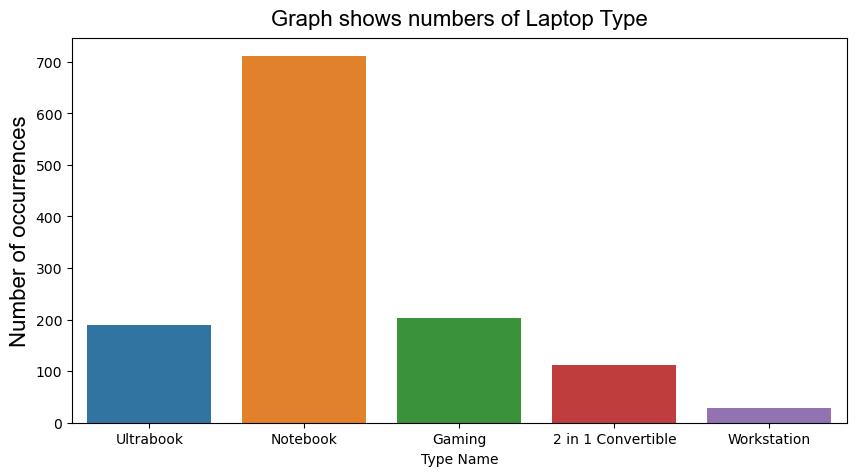

In [454]:
countplot('TypeName', 'Type Name', 'Number of occurrences', 'Graph shows numbers of Laptop Type')
#Laptop type Notebook are the most in the data set


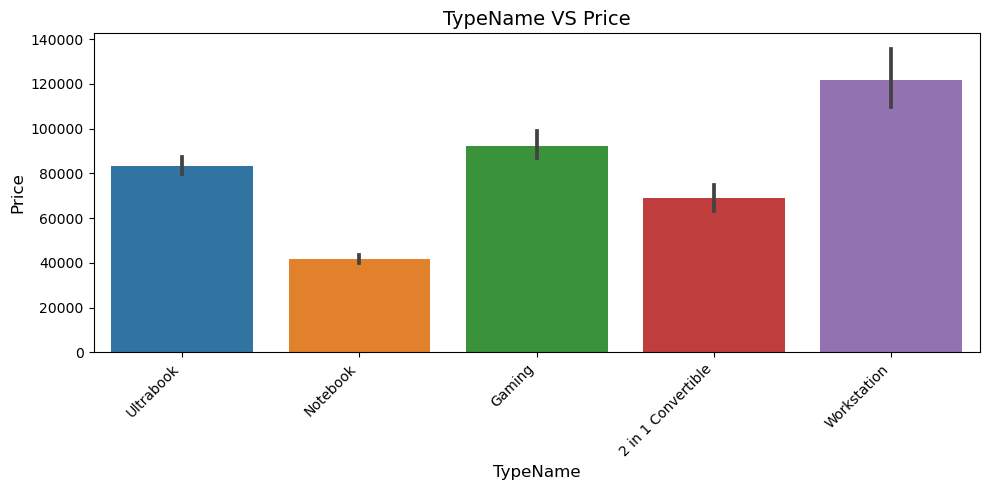

In [455]:
plt.figure(figsize=(10, 5))
plot = sns.barplot(x=laptop_data['TypeName'], y=laptop_data['Price'])
plt.xticks(rotation=45, ha='right')  # Rotate labels 45 degrees and align to the right
plt.xlabel('TypeName', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('TypeName VS Price', fontsize=14)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

#Workstation are the most costly than others.



<Axes: xlabel='Inches', ylabel='Density'>

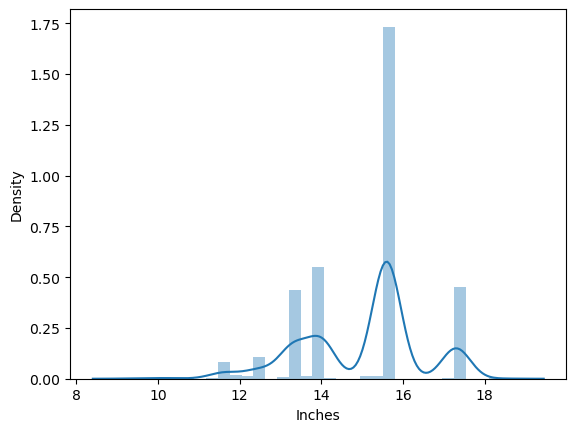

In [456]:
sns.distplot(laptop_data['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

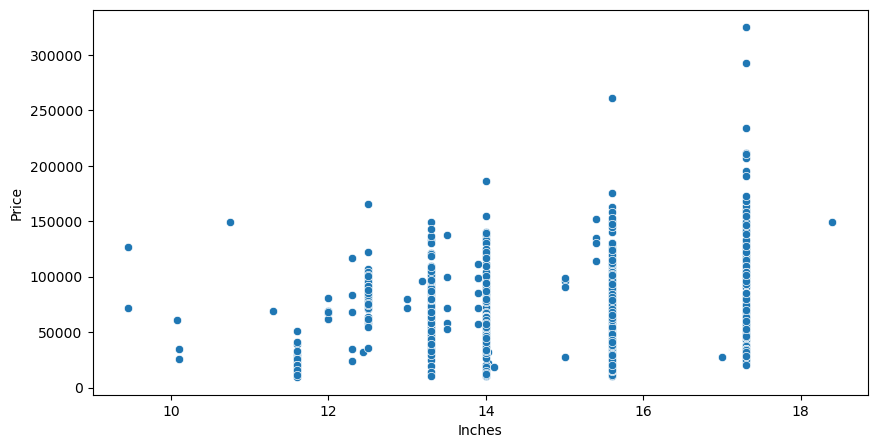

In [457]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = laptop_data['Inches'], y = laptop_data['Price'])
#from above graph we can see that the higher the size of laptop screeen the higher the price of laptop.
#inshort Size does matter :)

In [458]:
laptop_data['touchscreen'] = laptop_data['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

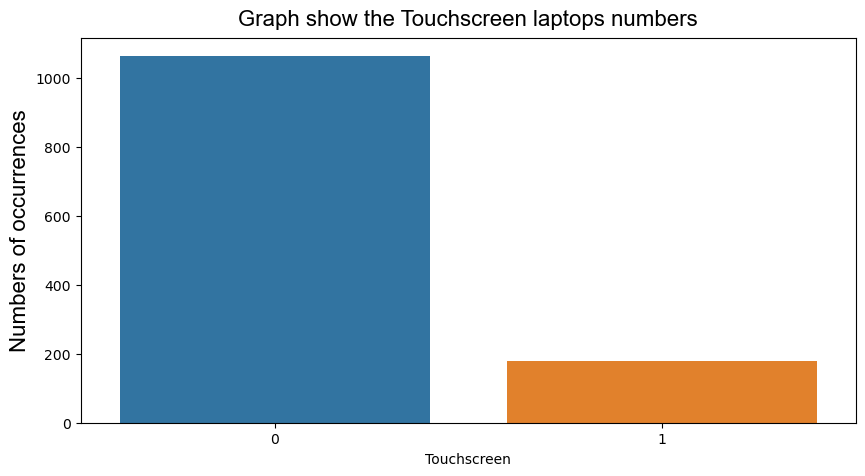

In [459]:
countplot('touchscreen','Touchscreen', 'Numbers of occurrences', 'Graph show the Touchscreen laptops numbers')

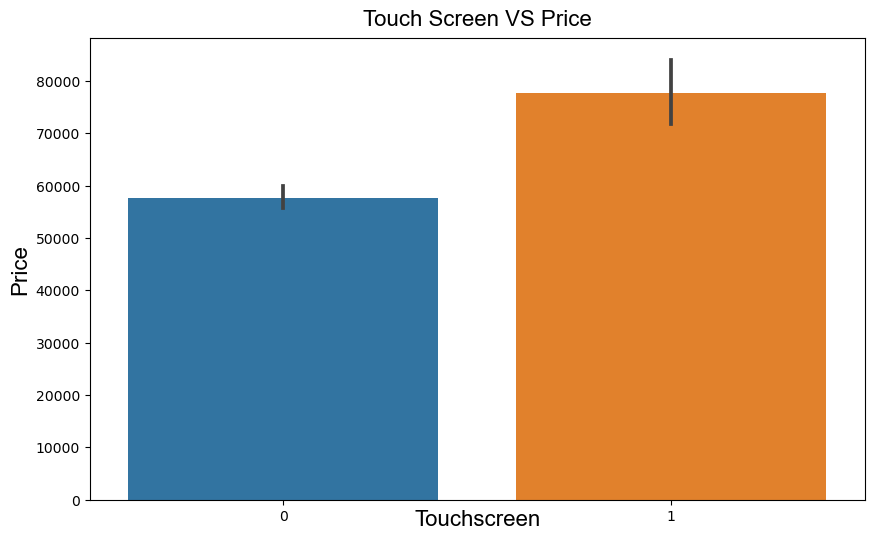

In [460]:
plt.figure(figsize = (10,6))
sns.barplot(x = laptop_data['touchscreen'], y = laptop_data['Price'])
plt.title('Touch Screen VS Price', ** font)
plt.xlabel('Touchscreen', **font)
plt.ylabel('Price', **font)
plt.show()

In [461]:
laptop_data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'screen_resolution',
       'processor_speed', 'processor_brand', 'processor_type', 'ssd_storage',
       'hdd_storage', 'flash_storage', 'os', 'touchscreen'],
      dtype='object')

In [462]:
laptop_data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,processor_speed,processor_brand,processor_type,ssd_storage,hdd_storage,flash_storage,os,touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2.3,Intel,Core i5,128,0,0,macos,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1.8,Intel,Core i5,0,0,128,macos,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,2.5,Intel,Core i5 7200U,256,0,0,no,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,2.7,Intel,Core i7,512,0,0,macos,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,3.1,Intel,Core i5,256,0,0,macos,0


In [463]:
laptop_data['Ips'] = laptop_data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

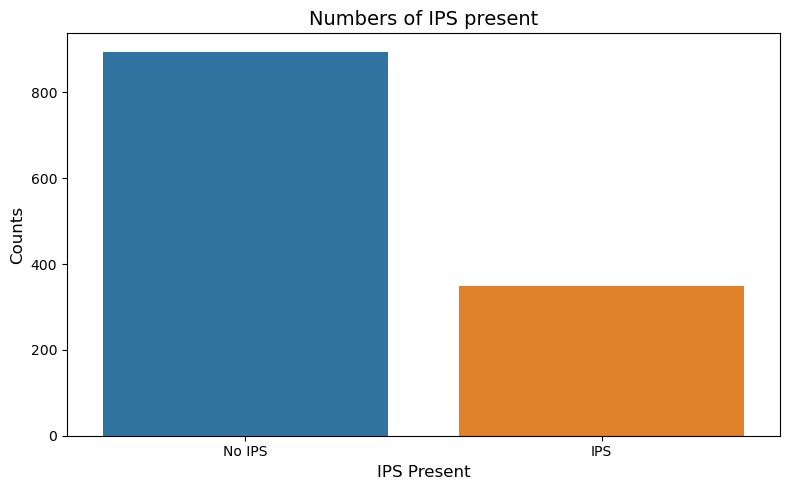

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming laptop_data['ScreenResolution'] contains strings like '1920x1080 IPS'
laptop_data['Ips'] = laptop_data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

ips_counts = laptop_data['Ips'].value_counts()

plt.figure(figsize=(8, 5))  # Adjust figure size as needed
sns.barplot(x=ips_counts.index, y=ips_counts.values)
plt.title('Numbers of IPS present', fontsize=14)
plt.xlabel('IPS Present', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No IPS', 'IPS'])
plt.tight_layout()
plt.show()

#Non IPs panel laptops are most in dataset



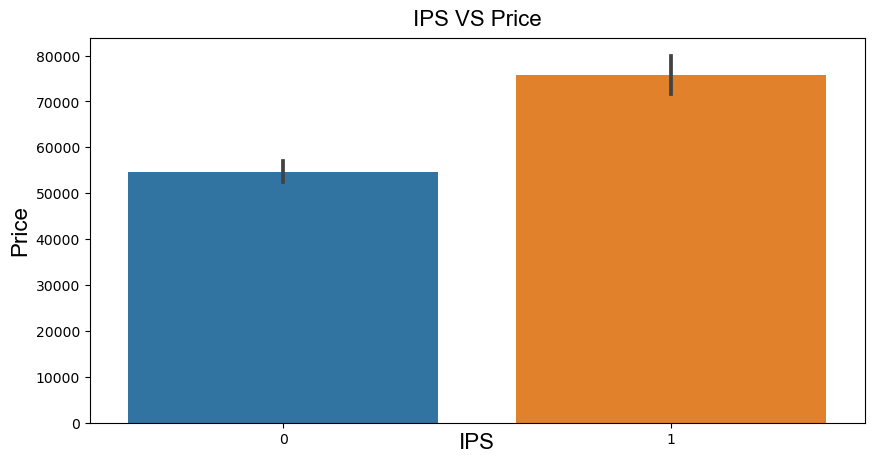

In [465]:
plt.figure(figsize = (10,5))
sns.barplot(x = laptop_data['Ips'], y = laptop_data['Price'])
plt.title('IPS VS Price', ** font)
plt.xlabel('IPS', **font)
plt.ylabel('Price', **font)
plt.show()
#we can see that the price of laptops also depend on ips panel


In [466]:
laptop_data['processor_type'].head()

0           Core i5
1           Core i5
2     Core i5 7200U
3           Core i7
4           Core i5
Name: processor_type, dtype: object

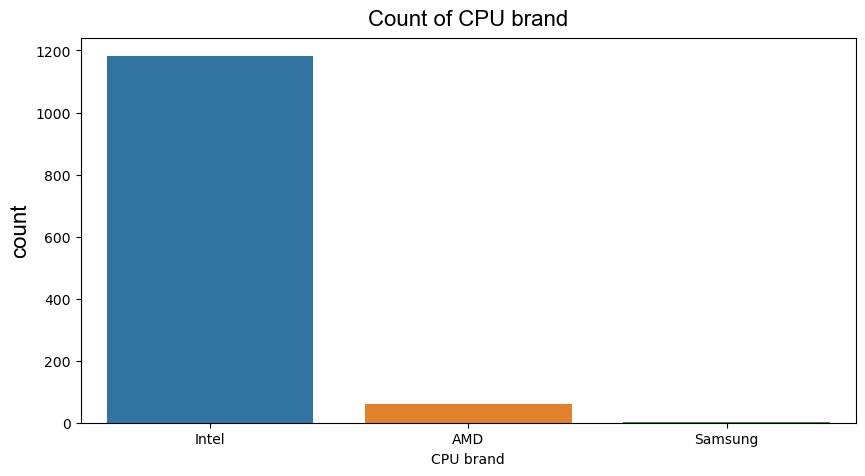

In [467]:
countplot('processor_brand', 'CPU brand', 'count', 'Count of CPU brand')

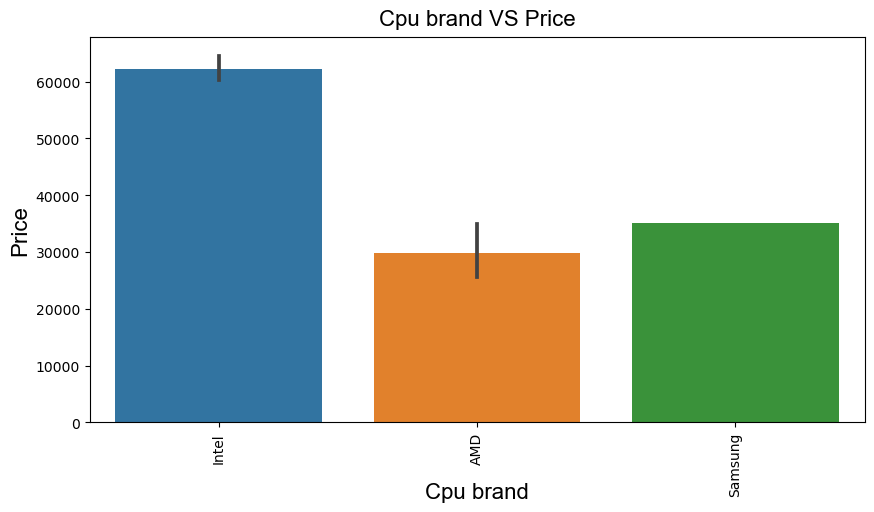

In [468]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'processor_brand', y = 'Price', data = laptop_data)
plt.xticks(rotation = 90)
plt.xlabel('Cpu brand',  **font)
plt.ylabel('Price', **font)
plt.title('Cpu brand VS Price', **font)
plt.show()

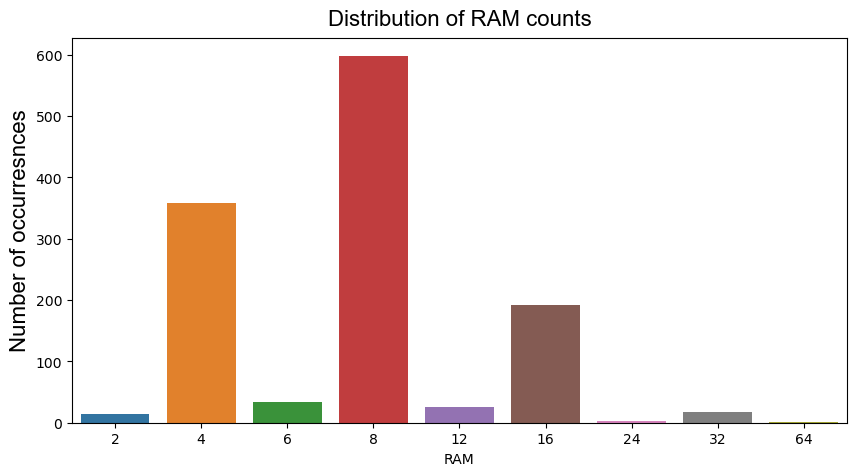

In [469]:
countplot('Ram', 'RAM', 'Number of occurresnces', 'Distribution of RAM counts')
#Laptop with 8 GB rams are the most in the dataset.


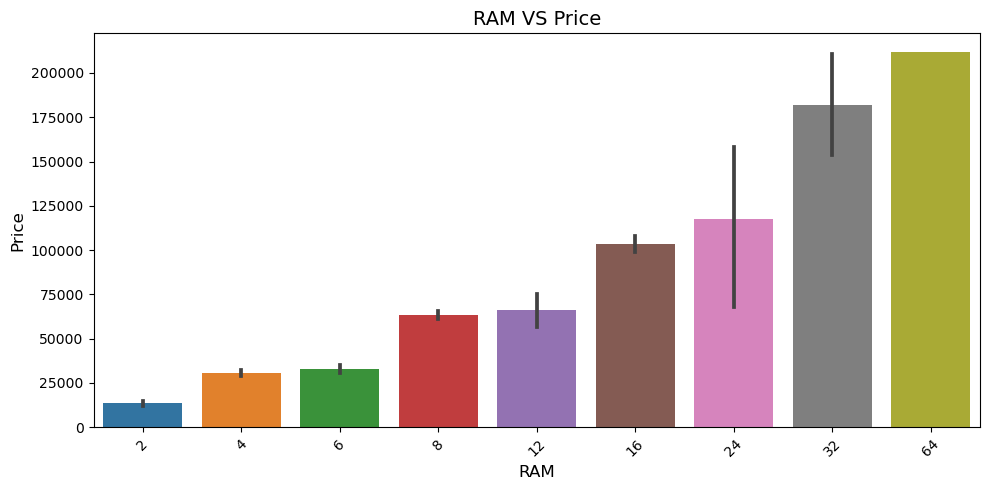

In [470]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'Ram', y = 'Price', data = laptop_data)
plt.xticks(rotation = 45)
plt.xlabel('RAM',  fontsize=12)
plt.ylabel('Price',fontsize=12)
plt.title('RAM VS Price', fontsize=14)
plt.tight_layout()
plt.show()



In [471]:
laptop_data.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price', 'screen_resolution',
       'processor_speed', 'processor_brand', 'processor_type', 'ssd_storage',
       'hdd_storage', 'flash_storage', 'os', 'touchscreen', 'Ips'],
      dtype='object')

In [472]:
laptop_data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620             269
Intel HD Graphics 520             177
Intel UHD Graphics 620             66
Nvidia GeForce GTX 1050            64
Nvidia GeForce GTX 1060            48
Nvidia GeForce 940MX               42
AMD Radeon 530                     39
Intel HD Graphics 500              39
Nvidia GeForce GTX 1070            29
Intel HD Graphics 400              29
Nvidia GeForce GTX 1050 Ti         27
Intel HD Graphics                  22
AMD Radeon R5 M430                 20
Nvidia GeForce 930MX               20
AMD Radeon 520                     16
Nvidia GeForce MX150               15
Intel HD Graphics 615              14
AMD Radeon R7 M445                 14
Intel HD Graphics 515              13
Nvidia GeForce 920MX               12
Intel HD Graphics 505              12
Nvidia GeForce GTX 960M            12
AMD Radeon R5                      11
Nvidia GeForce GTX 980M            10
Intel HD Graphics 405               9
Nvidia Quadro M1200                 9
Intel Ir

In [473]:
laptop_data['Gpu brand']  = laptop_data['Gpu'].apply(lambda x:x.split()[0])

In [474]:
laptop_data['Gpu brand'].value_counts()

Gpu brand
Intel     683
Nvidia    389
AMD       170
ARM         1
Name: count, dtype: int64

In [475]:
laptop_data = laptop_data[laptop_data['Gpu brand'] != 'ARM']


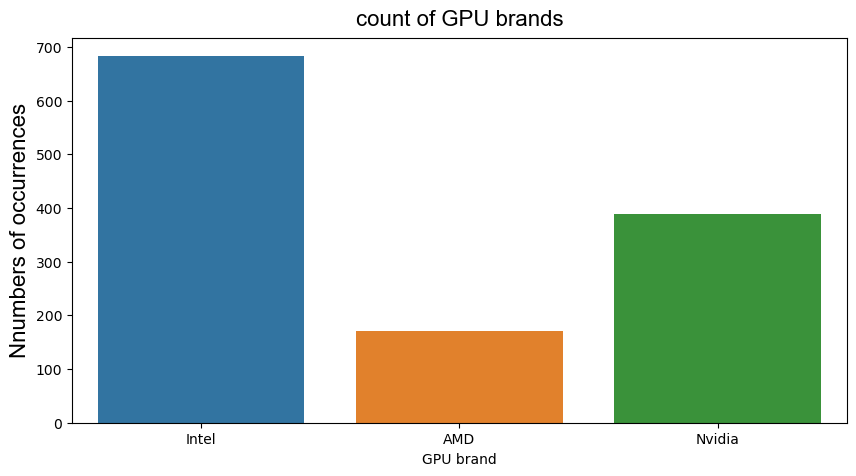

In [476]:
countplot('Gpu brand', 'GPU brand', 'Nnumbers of occurrences', 'count of GPU brands')

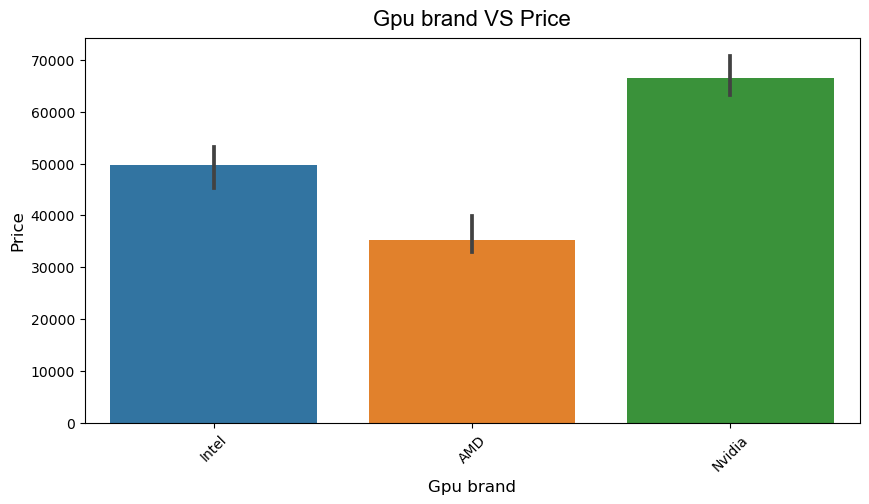

In [477]:
plt.figure(figsize = (10,5))
sns.barplot(x=laptop_data['Gpu brand'],y=laptop_data['Price'],estimator=np.median)
plt.xticks(rotation = 45)
plt.xlabel('Gpu brand',  fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Gpu brand VS Price', **font)
plt.show()

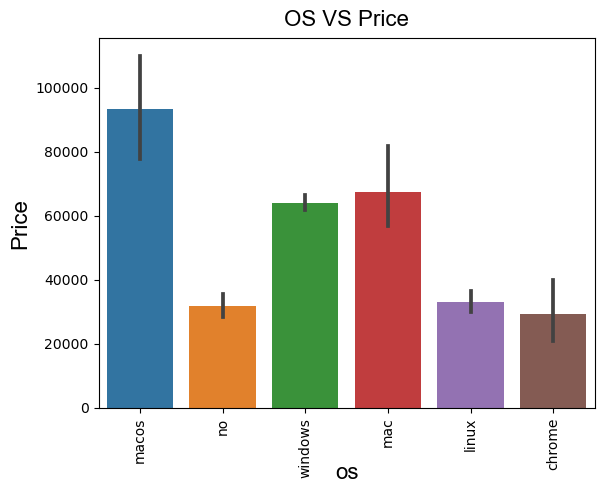

In [478]:
sns.barplot(x=laptop_data['os'],y=laptop_data['Price'])
plt.xticks(rotation='vertical')
plt.xlabel('os',  **font)
plt.ylabel('Price', **font)
plt.title('OS VS Price', **font)
plt.show()

<Axes: xlabel='Weight', ylabel='Density'>

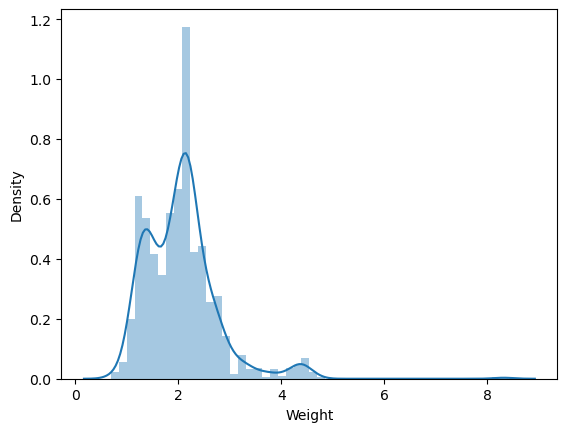

In [479]:
sns.distplot(laptop_data['Weight'])

Text(0.5, 1.0, 'Weight VS Price')

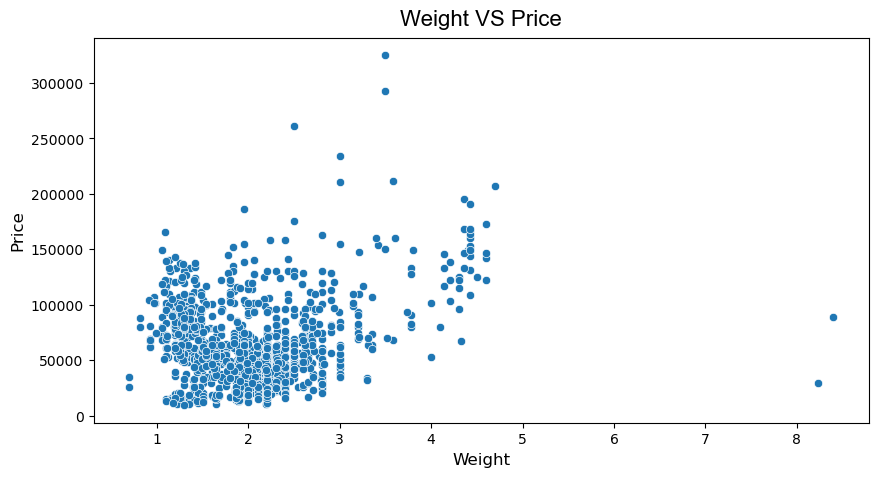

In [480]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=laptop_data['Weight'],y=laptop_data['Price'])
plt.xlabel('Weight',  fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Weight VS Price', **font)

In [481]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1243
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1242 non-null   object 
 1   TypeName           1242 non-null   object 
 2   Inches             1242 non-null   float64
 3   ScreenResolution   1242 non-null   object 
 4   Cpu                1242 non-null   object 
 5   Ram                1242 non-null   int32  
 6   Memory             1242 non-null   object 
 7   Gpu                1242 non-null   object 
 8   OpSys              1242 non-null   object 
 9   Weight             1242 non-null   float64
 10  Price              1242 non-null   float64
 11  screen_resolution  1242 non-null   object 
 12  processor_speed    1242 non-null   object 
 13  processor_brand    1242 non-null   object 
 14  processor_type     1242 non-null   object 
 15  ssd_storage        1242 non-null   object 
 16  hdd_storage        1242 non-n

In [482]:
laptop_data['Price'] = pd.to_numeric(laptop_data['Price'], errors='coerce')

In [483]:
#Company	TypeName	Ram	Weight	Touchscreen	Ips	ppi	processor_brand,processor_type,	HDD	SSD	Gpu brand	os

In [513]:
columns_to_keep = [
    'Company', 'TypeName', 'Ram', 'Weight', 'touchscreen', 'Ips',
    'processor_brand','Price', 'processor_type', 'hdd_storage', 'ssd_storage', 'Gpu brand', 'os'
]

laptop_data=laptop_data[columns_to_keep]

In [514]:
laptop_data['hdd_storage'].unique()

array([  0, 500,   1,   2,  32, 128])

In [ ]:
laptop_data['hdd_storage'] = laptop_data['hdd_storage'].str.replace(' TB', '000GB').str.replace(' GB', '')
laptop_data['hdd_storage'] = laptop_data['hdd_storage'].str.replace('TB', '000').str.replace(' ', '')

def convert_storage_to_gb(value):
    parts = value.split('000')
    total_gb = 0
    for part in parts:
        if part.isdigit():
            total_gb += int(part)
        elif part:
            total_gb += int(part) * 1000
    return total_gb

laptop_data['hdd_storage'] = laptop_data['hdd_storage'].apply(convert_storage_to_gb)
laptop_data['hdd_storage'] = laptop_data['hdd_storage'].astype(int)

In [516]:
laptop_data['hdd_storage'].dtype

dtype('int32')

In [517]:
laptop_data['ssd_storage']=laptop_data['ssd_storage'].astype(int)

In [518]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1243
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1242 non-null   object 
 1   TypeName         1242 non-null   object 
 2   Ram              1242 non-null   int32  
 3   Weight           1242 non-null   float64
 4   touchscreen      1242 non-null   int64  
 5   Ips              1242 non-null   int64  
 6   processor_brand  1242 non-null   object 
 7   Price            1242 non-null   float64
 8   processor_type   1242 non-null   object 
 9   hdd_storage      1242 non-null   int32  
 10  ssd_storage      1242 non-null   int32  
 11  Gpu brand        1242 non-null   object 
 12  os               1242 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(6)
memory usage: 121.3+ KB


In [519]:
X = laptop_data.drop(columns=['Price'])
y = np.log(laptop_data['Price'])

In [545]:
X

,Company,TypeName,Ram,Weight,touchscreen,Ips,processor_brand,processor_type,hdd_storage,ssd_storage,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,Intel,Core i5,0,128,Intel,macos
1,Apple,Ultrabook,8,1.34,0,0,Intel,Core i5,0,0,Intel,macos
2,HP,Notebook,8,1.86,0,0,Intel,Core i5 7200U,0,256,Intel,no
3,Apple,Ultrabook,16,1.83,0,1,Intel,Core i7,0,512,AMD,macos
4,Apple,Ultrabook,8,1.37,0,1,Intel,Core i5,0,256,Intel,macos
...,...,...,...,...,...,...,...,...,...,...,...,...
1239,Asus,Notebook,4,2.20,0,0,Intel,Core i7 6500U,500,0,Nvidia,windows
1240,Lenovo,2 in 1 Convertible,4,1.80,1,1,Intel,Core i7 6500U,0,128,Intel,windows
1241,Lenovo,2 in 1 Convertible,16,1.30,1,1,Intel,Core i7 6500U,0,512,Intel,windows
1242,Lenovo,Notebook,2,1.50,0,0,Intel,Celeron Dual Core N3050,0,0,Intel,windows


In [521]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
5        9.967026
6       11.644108
7       11.030615
8       11.285443
9       10.621952
10       9.951658
11       9.819076
12      11.775302
13      10.187967
14      11.116331
15      11.301072
16      10.588945
17      11.933438
18      10.188167
19      10.862093
20      10.882316
21       9.528521
22      10.683645
23      10.466285
24      10.012572
25      10.977717
26      10.660173
27      11.144141
28      10.773501
29       9.476778
30       9.268866
31      10.060060
32      11.508720
33      10.881314
34       9.493014
35       9.880923
36      10.862093
37      10.167289
38      10.754346
39       9.939140
40      11.288115
41      10.235123
42      10.500591
43      10.882316
44      11.233269
45      11.144911
46      10.435465
47      10.119747
48      10.710153
49       9.963243
50      10.981350
51       9.926204
52      10.619090
53      10.060060
54      10.349205
55      11

In [522]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [523]:
X_train

,Company,TypeName,Ram,Weight,touchscreen,Ips,processor_brand,processor_type,hdd_storage,ssd_storage,Gpu brand,os
917,Acer,Notebook,4,2.230,0,0,Intel,Core i5 7200U,500,0,Intel,windows
600,Dell,Notebook,4,2.250,0,0,Intel,Core i3 6006U,1,0,Intel,linux
969,HP,Ultrabook,8,1.110,1,1,Intel,Core i7 7500U,0,256,Intel,windows
1214,Dell,2 in 1 Convertible,16,2.770,1,0,Intel,Core i7 7500U,0,512,Nvidia,windows
285,Lenovo,Notebook,8,2.050,0,0,Intel,Core i5 8250U,0,256,Intel,windows
301,Lenovo,Notebook,8,1.100,0,1,Intel,Core i5 7200U,0,256,Intel,windows
126,Dell,Notebook,4,2.200,0,0,Intel,Core i3 6006U,1,0,AMD,windows
663,MSI,Gaming,8,2.200,0,0,Intel,Core i5 7300HQ,0,256,Nvidia,windows
915,HP,Gaming,8,2.750,0,1,Intel,Core i5 6300HQ,1,128,Nvidia,windows
1123,HP,Notebook,4,1.860,0,0,AMD,E-Series 7110,500,0,AMD,windows


In [527]:
laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1242 entries, 0 to 1243
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1242 non-null   object 
 1   TypeName         1242 non-null   object 
 2   Ram              1242 non-null   int32  
 3   Weight           1242 non-null   float64
 4   touchscreen      1242 non-null   int64  
 5   Ips              1242 non-null   int64  
 6   processor_brand  1242 non-null   object 
 7   Price            1242 non-null   float64
 8   processor_type   1242 non-null   object 
 9   hdd_storage      1242 non-null   int32  
 10  ssd_storage      1242 non-null   int32  
 11  Gpu brand        1242 non-null   object 
 12  os               1242 non-null   object 
dtypes: float64(2), int32(3), int64(2), object(6)
memory usage: 121.3+ KB


### LINEAR REGRESSION

In [539]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming laptop_data is your DataFrame containing all data
# Define X and y
X = laptop_data.drop(columns=['Price'])
y = np.log(laptop_data['Price'])  # Taking the logarithm of the price

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Ensure categorical columns are stripped of any leading/trailing spaces
categorical_cols = ['Company', 'TypeName', 'processor_brand', 'processor_type', 'Gpu brand', 'os']
for col in categorical_cols:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()

# Initialize ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')


step2 = LinearRegression()

# Define pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

# Predict on test data
y_pred = pipe.predict(X_test)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8480824529653125
MAE: 0.1880305170793793


### RANDOM FOREST

In [540]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

X = laptop_data.drop(columns=['Price'])
y = np.log(laptop_data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

categorical_cols = ['Company', 'TypeName', 'processor_brand', 'processor_type', 'Gpu brand', 'os']
for col in categorical_cols:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)


print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8705246387024291
MAE: 0.1722677162870706


### GRADIENT BOOSTING

In [541]:
X = laptop_data.drop(columns=['Price'])
y = np.log(laptop_data['Price'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

categorical_cols = ['Company', 'TypeName', 'processor_brand', 'processor_type', 'Gpu brand', 'os']
for col in categorical_cols:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()

step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')
step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8789217295666507
MAE 0.16359101625260575


### Hyperparameter tuning

In [542]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Assuming laptop_data is your DataFrame containing all data
# Define X and y
X = laptop_data.drop(columns=['Price'])
y = np.log(laptop_data['Price'])  # Taking the logarithm of the price

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

# Ensure categorical columns are stripped of any leading/trailing spaces
categorical_cols = ['Company', 'TypeName', 'processor_brand', 'processor_type', 'Gpu brand', 'os']
for col in categorical_cols:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()

# Initialize ColumnTransformer with OneHotEncoder
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

# Define Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=3)

# Define pipeline
pipe = Pipeline([
    ('step1', step1),
    ('gb_reg', gb_reg)
])

# Define parameter grid for GridSearchCV
param_grid = {
    'gb_reg__n_estimators': [100, 200, 300],  # Number of boosting stages
    'gb_reg__learning_rate': [0.05, 0.1, 0.2],  # Learning rate
    'gb_reg__max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'gb_reg__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'gb_reg__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', verbose=1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best R2 score on validation set:", grid_search.best_score_)

# Predict on test data with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
print('R2 score on test set:', r2_score(y_test, y_pred))
print('MAE on test set:', mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'gb_reg__learning_rate': 0.2, 'gb_reg__max_depth': 3, 'gb_reg__min_samples_leaf': 4, 'gb_reg__min_samples_split': 10, 'gb_reg__n_estimators': 300}
Best R2 score on validation set: 0.8658430268402764
R2 score on test set: 0.8871359429546478
MAE on test set: 0.15480370510493724
